# Link github:

https://github.com/npqd/P4DS_FinalProject.git

---

# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

---

# Thu thập dữ liệu

### Mô tả cơ bản về dữ liệu

- Dữ liệu của hơn 40,000 trận đấu bóng đá quốc tế từ 1872-2019
- Tên các quốc gia theo lục địa
- Tên khác/ cũ của các quốc gia 

### Mục đích chọn dữ liệu

- Bóng đá trước giờ vẫn luôn là môn thể thao vua và luôn được mọi người quan tâm nhiều nhất. Qua dữ liệu đã có, ta có thể biết được tình hình phát triển bóng đá của các quốc gia, sự thay đổi về vị thế bóng đá của các nước qua các năm. Ngoài ra thông qua lịch sử đối đầu, chúng ta có thể dự đoán được phần nào các kết quả trong tương lai
- Data tên quốc gia theo lục địa để so sánh các quốc gia trong cùng khu vực bóng đá
- Data các tên gọi của quốc gia để quy ước tên các quốc gia trong dữ liệu là tên hiện tại của quốc gia đó

### Mô tả chi tiết dữ liệu

- `result.csv` Dữ liệu chứa 42,899 kết quả của các trận đá bóng quốc tế từ năm 1872 đến 2021. Từ những giải đấu được tổ chức bởi FIFA World Cup đến những giải đấu châu lục cho đến cả những giải đấu giao hữu. Đây là dữ liệu của những trận bóng đá nam, không bao gồm những giải đấu như Olympic hoặc của những đội hình phụ hoặc U23... hoặc là các giải đấu trong nước (chỉ tính ở cấp đội tuyển quốc gia)
- `country_continent` Phân nhóm các quốc gia theo tên các châu lục, các vùng của một châu lục
- `country_allname` [wiki_name](https://en.wikipedia.org/wiki/List_of_alternative_country_names) các tên gọi thay thế, hoặc tên gọi trong quá khứ của từng quốc gia

#### `result.csv`

- `date` - ngày diễn ra trận đấu
- `home_team` - tên của đội chủ nhà
- `away_team` - tên của đội khách
- `home_score` - số bàn thắng đội chủ nhà ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ, không tính loạt luân lưu
- `away_score` - số bàn thắng đội khách ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ, không tính loạt luân lưu
- `tournament` - tên của giải đấu
- `city` - tên của thành phố trận đấu diễn ra
- `country` - tên của quốc gia mà trận đấu diễn ra
- `neutral` - cột TRUE/FALSE , nếu được tỏ trức ở một sân trung lập thì trả về giá trị TRUE

* **Lưu ý:**
    - `home_team` và `away_team` là tên của đội và lúc diễn ra trận bóng. Ví dụ năm 1882, tên đội `Ireland` đá với `England` thì trong data này sẽ được gọi là `Northern Ireland` bởi vì đây là tên hiện tại của đội tuyển `Ireland` năm 1882. Việc quy ước này để có thể dễ dàng lấy thống kê
    - `country` sẽ là tên của quốc gia lúc diễn ra trận đấu. Vào những năm 1950, `Ghana` tuy đá ở `Gold Coast` nhưng vẫn là đội chủ nhà do cột `neutral` trả về giá trị FALSE


#### `country_continent.csv`

-   `Country or Area` : Tên quốc gia, lãnh thổ
-   `ISO-alpha3 Code`: Mã ISO-alpha3 của quốc gia
-   `M49 Code`: Mã M49 của quốc gia
-   `Region 1`: Tên khu vực 1
-   `Region 2`: Tên khu vực 2
-   `Continent`: Tên lục địa

- Lưu ý:  Độ rộng `Continent` > `Region 2` > `Region 1`

#### `country_allname.csv`

### Nguồn thu thập dữ liệu

[result](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017)

[country_continent](https://statisticstimes.com/geography/countries-by-continents.php)

[country_allname](https://github.com/aaronschiff/country-names/blob/master/country-names-cross-ref.csv)

---

# Khám phá dữ liệu

### Đọc dữ liệu

Đọc dữ liệu các trận đấu vào `df_match`

In [2]:
df_match  = pd.read_csv('results.csv')
df_match.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23623,2001-01-15,Chile,Bahrain,2,0,Millennium Cup,Calcutta,India,True
32091,2010-03-03,Australia,Indonesia,1,0,AFC Asian Cup qualification,Brisbane,Australia,False
28909,2006-11-15,Luxembourg,Togo,0,0,Friendly,Luxembourg,Luxembourg,False
11585,1980-10-20,Myanmar,Morocco,2,2,Merdeka Tournament,Kuala Lumpur,Malaysia,True
10751,1978-10-11,Portugal,Belgium,1,1,UEFA Euro qualification,Lisbon,Portugal,False


### Dữ liệu có bao nhiêu dòng và cột ?

In [3]:
df_continent = pd.read_csv('country_continent.csv')
df_continent = df_continent.set_index(df_continent.columns[0])
#TEST
df_continent.sample(5)

,Code,Country,Continent
Index,,,
57,COD,DR Congo,Africa
23,BHU,Bhutan,Asia
29,BRU,Brunei,Asia
65,SWZ,Eswatini,Africa
61,ENG,England,Europe


### Tiền xử lý

- Để chắc chắn rằng, những quốc gia chúng ta đang tìm hiểu là những quốc gia hiện tại được công nhận bởi FIFA, vì vậy ta sẽ chỉ giữ những dữ liệu của những trận đấu mà và `home_team` và `away_team` đều là đội bóng có tên trong danh sách FIFA bây giờ.
- Ta phải làm vậy vì giờ bóng đá quốc tế được sắp xếp theo bảng xếp hạng của FIFA, nên nếu không có tên trong FIFA thì các trận đấu gần như chẳng được tính điểm

In [4]:
df_match= df_match[df_match['home_team'].isin(df_continent['Country']) & \
     df_match['away_team'].isin(df_continent['Country'])]
df_match.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
14907,1988-02-06,Poland,Romania,2,2,Friendly,Haifa,Israel,True
5377,1963-04-02,Syria,Tunisia,0,1,Arab Cup,Beirut,Lebanon,True
33048,2011-03-27,Sudan,Eswatini,3,0,African Cup of Nations qualification,Omdurman,Sudan,False
15063,1988-05-24,England,Colombia,1,1,Rous Cup,London,England,False
11101,1979-09-12,Norway,Belgium,1,2,UEFA Euro qualification,Oslo,Norway,False


- Theo như mô tả về dữ liệu ở trên và quan sát thì một dòng cho biết thông tin về một trận đấu ở cấp đội tuyển quốc gia giữa hai nước. Có vẻ không có dòng nào bị "lạc loài"

Tiếp theo, ta tính số dòng và số cột của DataFrame `df_match` và `df_continent`, lưu vào biến `match_rows`,`match_cols` và `continent_rows`,`continent_cols`.

In [5]:
match_rows,match_cols = df_match.shape
print('number rows of match: ',match_rows)
print('number cols of match: ',match_cols)

number rows of match:  39480
number cols of match:  9


In [6]:
continent_rows,continent_cols = df_continent.shape
print('number rows of continent: ',continent_rows)
print('number cols of continent: ',continent_cols)

number rows of continent:  211
number cols of continent:  3


### Mỗi dòng có ý nghĩa gì? Có vấn đề gì các dòng có ý nghĩa khác nhau không ?

In [6]:
df_match.dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral        object
dtype: object

- Các cột `"date, home_team, away_team, tournament, city, country, neutral"` đang có kiểu dữ liệu là `object`.
- Thường thì kiểu `object` thường ám chỉ kiểu dữ liệu `chuỗi`.
- Tuy nhiên ta sẽ đưa cột `date` về kiểu dữ liệu `date_time`.

In [7]:
df_match['date'] = pd.to_datetime(df_match['date'], format="%Y-%m-%d")

### Với mỗi cột dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ta sẽ tính một số thông tin sau:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Giá trị min.
- Giá trị median.
- Giá trị max.

In [9]:
def calculate_quartile(data):
    nume_col_info_df = pd.DataFrame()
    for col in data.keys():
        if data[col].dtype in [np.int64, np.float64] :
            missing = data[col].isnull().sum()
            missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]),2)
            min_value = data[col].min()         
            median = data[col].median() 
            max_value = data[col].max()
            row_line = pd.Series([missing,missing_percentage, min_value,  median, max_value], 
                                 index = ['num_missing','missing_percentage', 'min',  'median', 'max'])
            nume_col_info_df[col] = row_line
    return nume_col_info_df

In [10]:
info_df = calculate_quartile(df_match)
info_df

,home_score,away_score
num_missing,5.00,5.00
missing_percentage,0.01,0.01
min,0.00,0.00
median,1.00,1.00
max,31.00,21.00


- Từ bảng trên, ta có thể `max` của `home_score` và `away_score` là **31** và **21** , có lẽ đây là những trận đấu vô cùng cởi mở từ các đội hoặc là những trận đấu một chiều, trình độ chênh lệch giữ hai đội quá lớn.
- Không có gì bất thường.

### Với các cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta sẽ tính một số thông tin sau:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Số lượng các giá trị các nhau (không xét giá trị thiếu).
- TỈ lệ % (0->100) của mỗi giá trị của cột được sắp xếp theo tỉ lệ % giảm dần (không xét giá trị thiếu).

In [15]:
cate_col = ['home_team','away_team','tournament','city','country','neutral']

missing = []
missing_percentage=[]
num_values=[]
value_percentages=[]

for column in cate_col:
    missing.append(df_match[column].isnull().sum())
    missing_percentage.append((df_match[column].isnull().sum() * 100 / len(df_match)).round(3))
    temp = df_match[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cate_col_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=cate_col)
cate_col_info_df

,home_team,away_team,tournament,city,country,neutral
num_missing,2,2,0,0,0,2
missing_percentage,0.005,0.005,0.0,0.0,0.0,0.005
num_values,307,304,126,2058,266,2
value_percentages,"{'Brazil': 1.4, 'Argentina': 1.3, 'Mexico': 1....","{'Uruguay': 1.3, 'Sweden': 1.3, 'England': 1.2...","{'Friendly': 40.0, 'FIFA World Cup qualificati...","{'Kuala Lumpur': 1.5, 'Doha': 1.1, 'Bangkok': ...","{'United States': 2.9, 'France': 1.9, 'Malaysi...","{False: 75.3, True: 24.7}"


### **2 file country_continent.csv và country-names-cross-ref đã được mô tả ở trên và chỉ là file hỗ trợ việc tra cứu tên các nước (ở trong quá khứ và hiện tại) trong file result nên ta chỉ đọc hai file này lên để xem**

In [17]:
country_continent_df = pd.read_csv('country_continent.csv')
country_continent_df.head()

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania


In [18]:
country_name_cross_ref_df = pd.read_csv('country-names-cross-ref.csv')
country_name_cross_ref_df.head()

,Afghanistan (1911 Encyclopedia),Afghanistan
0,The Islamic Republic of Afghanistan,Afghanistan
1,Islamic Republic of Afghanistan,Afghanistan
2,Afganistan,Afghanistan
3,ISO 3166-1:AF,Afghanistan
4,Afghanistan/Article from the 1911 Encyclopedia,Afghanistan


`df_match`

- Mỗi dòng cho biết thông tin về trận đấu bóng đá giữa 2 nước, thông qua quan sát sơ bộ thì có vẻ không có vấn đề gì, mỗi dòng khác nhau thể hiện thông tin khác nhau về mỗi trận đấu.

`df_continent`

Mỗi dòng cho biết thông tin về tên, mã code và khu vực của từng quốc gia theo FIFA, có vẻ như không có vấn đề gì

### Dữ liệu có các dòng bị lặp không ? 

In [7]:
np.all([df_match.duplicated(keep=False)])

False

- Có vẻ như không có dòng dữ liệu nào bị lặp lại thông tin cả.

### Mỗi cột có ý nghĩa gì?

- Như đã mô tả ở phần Mô tả chi tiết dữ liệu, ta đã hiểu rõ về ý nghĩa của các cột
- Để tránh trường hợp bạn quên thì ta sẽ đọc lại thông tin của các cột thông qua 2 file text, `mean_result.csv` và `mean_continent.csv`

Thông tin `df_match`

In [8]:
match_cols_meaning = pd.read_csv('mean_result.csv')
pd.set_option('display.max_colwidth',None)
match_cols_meaning

,column_name,mean
0,date,ngày diễn ra trận đấu
1,home_team,tên của đội chủ nhà
2,away_team,tên của đội khách
3,home_score,số bàn thắng đội chủ nhà ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ - không tính loạt luân lưu
4,away_score,số bàn thắng đội khách ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ - không tính loạt luân lưu
5,tournament,tên của giải đấu
6,city,tên của thành phố trận đấu diễn ra
7,country,tên của quốc gia mà trận đấu diễn ra
8,neutral,cột TRUE/FALSE nếu được tỏ trức ở một sân trung lập thì trả về giá trị TRUE


Thông tin `df_continent`

In [9]:
continent_cols_meaning = pd.read_csv('mean_continent.csv')
pd.set_option('display.max_colwidth',None)
continent_cols_meaning

,column_name,mean
0,Country,Tên quốc gia - lãnh thổ theo FIFA
1,Code,Mã của quốc gia theo FIFA
2,Continent,Tên lục địa


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cần phải thay đổi hay không?

- Thông tin kiểu dữ liệu `df_match`

In [10]:
df_match.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

có 3 cột thể hiện dữ liệu numneric là `date` `home_score` và `away_score`. Nhưng ở đây `date` vẫn thể hiện kiểu dữ liệu là `object`, có vẻ như ta sẽ thay đổi kiểu dữ liệu cột `date` về dạng `datetime`

In [11]:
df_match['date'] = pd.to_datetime(df_match['date'], format="%Y-%m-%d")
df_match.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

- Có vẻ dữ liệu cột `date` không có vấn đề gì cả, vì khi chuyển qua datetime chương trình không báo lỗi

- Thông tin kiểu dữ liệu `df_continent`

In [12]:
df_continent.dtypes

Code         object
Country      object
Continent    object
dtype: object

Vì dữ liệu của `df_continent` được biểu diễn hoàn toàn dưới dạng chuỗi nên có vẻ không có gì cần phải thay đổi

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

#### Trước khi tìm hiểu kĩ về các dữ liệu dạng số, có giá trị nào không hợp lệ trong mỗi cột không?

1. Trước tiên ta kiểm tra cột `date`. Trong đó ta phải chắc chắn rằng không có trận đấu nào chưa được đá mà đã có kết quả, tức là thời gian lớn hơn thời điểm hiện tai mà có kết quả


In [13]:
np.all(df_match['date'] > np.datetime64(dt.date.today()))

False

- Vậy là không có dữ liệu nào của cột `date` có dấu hiệu bất thường

2. Tiếp theo kiểm tra 2 cột `home_score` và `away_score` coi có giá trị nào bị âm không?

In [14]:
len(df_match[(df_match['home_score'] < 0) | (df_match['away_score'] < 0) ])

0

- Vậy là dữ liệu 2 cột `home_socre` và `away_score` không có giá trị nào bị âm

#### Quay lại bước khám phá dữ liệu

Ta sẽ tính một số thông tin sau của các cột dữ liệu dạng số:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Giá trị min.
- Giá trị median.
- Giá trị max.

In [15]:

nume_col_info_df = pd.DataFrame()
for col in df_match.keys():
    if df_match[col].dtype in [np.int64, np.float64,'<M8[ns]'] :
        missing = df_match[col].isnull().sum()
        missing_percentage = round(df_match[col].isnull().sum() * 100 / len(df_match[col]),2)
        min_value = df_match[col].min()         
        median = df_match[col].median() 
        max_value = df_match[col].max()
        row_line = pd.Series([missing,missing_percentage, min_value,  median, max_value], 
                                index = ['num_missing','missing_percentage', 'min',  'median', 'max'])
        nume_col_info_df[col] = row_line
nume_col_info_df    

,date,home_score,away_score
num_missing,0,0.0,0.0
missing_percentage,0.0,0.0,0.0
min,1872-11-30 00:00:00,0.0,0.0
median,1999-04-28 00:00:00,1.0,1.0
max,2021-12-18 00:00:00,31.0,21.0


Mô hình hóa phân bố các giá trị số

Text(0.5, 1.0, 'number score away')

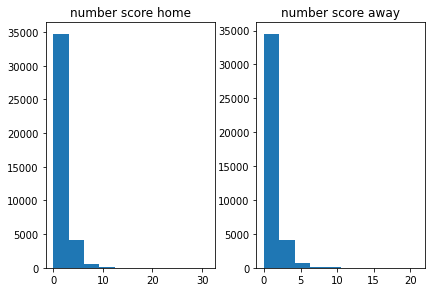

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()
ax1.hist(df_match.home_score);
ax1.set_title('number score home')
ax2.hist(df_match.away_score);
ax2.set_title('number score away')

In [29]:
df_match[['home_score','away_score']]

,home_score,away_score
0,0,0
1,4,2
2,2,1
3,2,2
4,3,0
...,...,...
43080,0,1
43081,1,0
43082,1,2
43083,0,1


In [30]:
# f = plt.figure(figsize=(8, 10))
# plt.matshow(df_match[['home_score','away_score']].corr(),fignum=f.number)
# plt.xticks(range(df_match.select_dtypes(['number']).shape[1]), df_match.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df_match.select_dtypes(['number']).shape[1]), df_match.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);


- Từ bảng trên, ta có thể max của `home_score` và `away_score` là 31 và 21 , có lẽ đây là những trận đấu vô cùng cởi mở từ các đội hoặc là những trận đấu một chiều, trình độ chênh lệch giữ hai đội quá lớn. min là 0.
- Nhìn vào đồ thị, ta hiểu được tại sao mean lại là 1
- Tương tự với `date` như đã tiền xử lý ở trên

     => Không có gì bất thường.

### Với các cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta sẽ tính một số thông tin sau:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Số lượng các giá trị các nhau (không xét giá trị thiếu).
- TỈ lệ % (0->100) của mỗi giá trị của cột được sắp xếp theo tỉ lệ % giảm dần (không xét giá trị thiếu).

In [23]:
#set colwidth whit row have too much info
pd.set_option('display.max_colwidth',100)

cate_col = ['home_team','away_team','tournament','city','country','neutral']

missing = []
missing_percentage=[]
num_values=[]
value_percentages=[]

for column in cate_col:
    missing.append(df_match[column].isnull().sum())
    missing_percentage.append((df_match[column].isnull().sum() * 100 / len(df_match)).round(3))
    temp = df_match[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cate_col_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=cate_col)

cate_col_info_df


,home_team,away_team,tournament,city,country,neutral
num_missing,0,0,0,0,0,0
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0
num_values,209,209,117,1885,248,2
value_percentages,"{'Brazil': 1.4, 'Argentina': 1.4, 'Mexico': 1.3, 'England': 1.3, 'Germany': 1.3, 'Sweden': 1.2, ...","{'Uruguay': 1.4, 'Sweden': 1.3, 'England': 1.3, 'Paraguay': 1.2, 'Hungary': 1.1, 'Argentina': 1....","{'Friendly': 40.0, 'FIFA World Cup qualification': 19.4, 'UEFA Euro qualification': 6.1, 'Africa...","{'Kuala Lumpur': 1.5, 'Doha': 1.2, 'Bangkok': 1.0, 'London': 1.0, 'Budapest': 0.9, 'Montevideo':...","{'United States': 3.0, 'France': 1.8, 'Malaysia': 1.7, 'England': 1.5, 'Germany': 1.4, 'Qatar': ...","{False: 76.4, True: 23.6}"


Mô hình hóa phân bố các dữ liệu


In [75]:
# df_match.home_score.sort_values()
# save = df_match.home_team.value_counts().head(7)
# ax = plt.bar(save.index,save.values)
# plt.xticks(rotation=90);
df_match[cate_col[6]]

IndexError: list index out of range

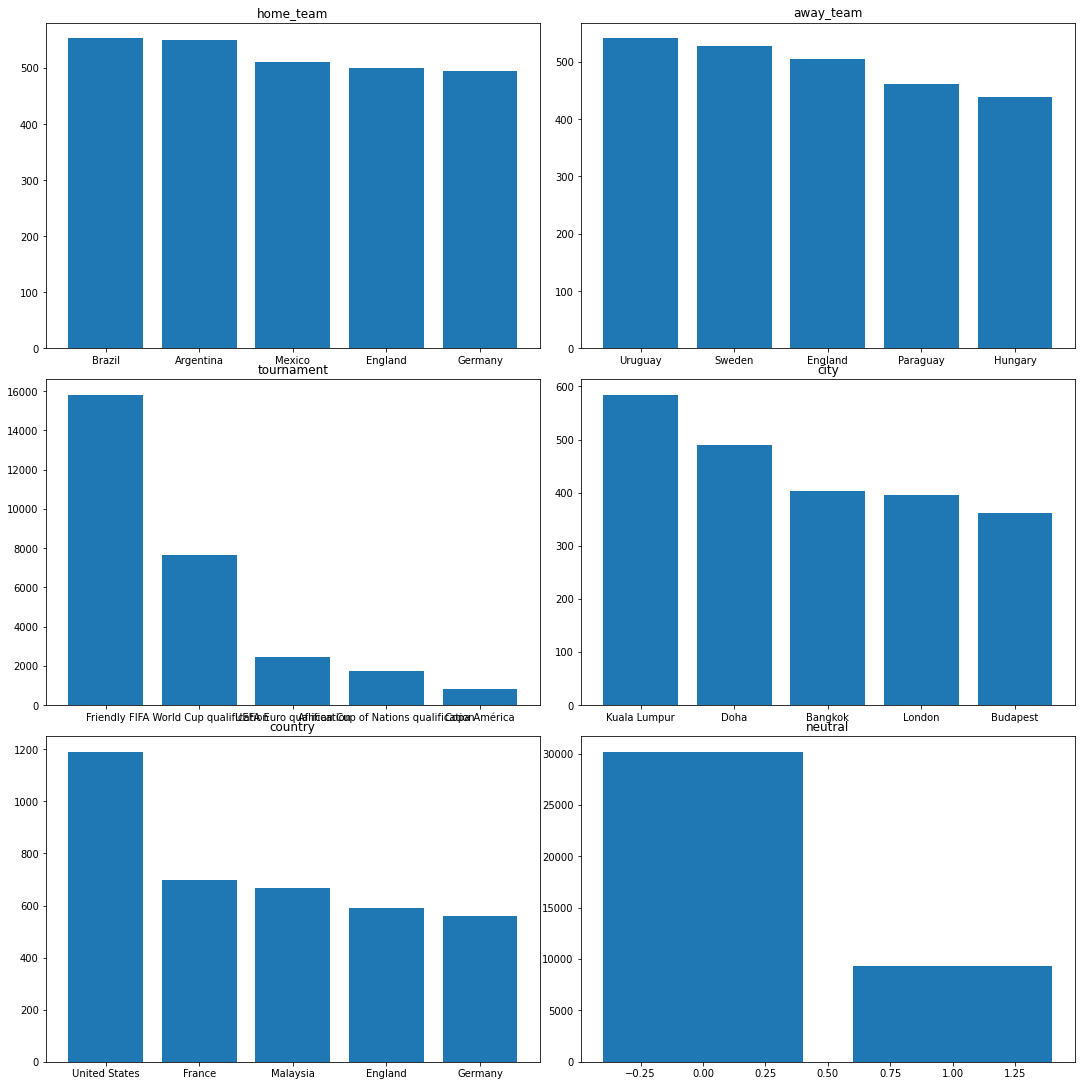

In [83]:
cate_col = ['home_team','away_team','tournament','city','country','neutral']

df_temp = df_match[cate_col]
fig, axs = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=1, w_pad=1, h_pad=1.0)
for i in range(0,3):
    for j in range(0,2):
        axs[i,j].bar(df_match[cate_col[i*2+j]].value_counts().head(5).index,\
            df_match[cate_col[i*2+j]].value_counts().head(5).values)
        axs[i,j].set_title(cate_col[i*2+j])


- Dữ liệu có vẻ không có gì bất thường, tỉ lệ các nước làm `home_team `và `away_team` khá tương đương, có sự chênh lệch này do ta đã xóa những trận đấu có chứa quốc gia không thuộc hệ thống của FIFA.
- Giao hữu là giải được tổ chức nhiều nhất trên thế giới nên nó chiếm tỉ lệ số trận cao hoàn toàn hợp lý
- Các giải đấu thường tổ chức ở một quốc gia trung lập nào nên tỉ lệ trận đấu sân trung lập nhiều hơn sân nhà là điều đương nhiên

---

# Đưa ra các câu hỏi cần trả lời

---

# Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

---

# Nhìn lại quá trình làm đồ án

### Học được những gì từ đồ án

### Những khó khăn khi thực hiện đồ án

---

# Tài liệu tham khảo

---

### Tiền xử lý dữ liệu

1. Để có thể so sánh trực quan các nước qua từng khu vực của nó thì ta sẽ thêm cột continent từ `df_continent` vào `df_result`

Bước 1: Kiểm tra coi `df_match` và `df_continent` có bị thiếu dữ liệu ở cột nào không? có dòng nào bị lặp không?
Bước 2: 

Bước 1:

`df_match` có bị thiếu dữ liệu ở cột nào không?

In [18]:
(df_match.isna().sum() /len(df_match)*100).round(1)

date          0.0
home_team     0.0
away_team     0.0
home_score    0.0
away_score    0.0
tournament    0.0
city          0.0
country       0.0
neutral       0.0
dtype: float64

Như vậy không có cột nào bị thiếu dữ liệu cả

Tương tự kiểm tra với `df_continent`

In [19]:
(df_continent.isna().sum() /len(df_continent)*100).round(1)

Code         0.0
Country      0.0
Continent    0.0
dtype: float64

Bước 2:

In [20]:
pd.merge(df_match,df_continent,left_on=)

SyntaxError: invalid syntax (Temp/ipykernel_1172/843053999.py, line 1)

Tương tự, dữ liệu về khu vực các nước cũng không bị thiếu 